/home/qwertz/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/qwertz/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


time  :  Time
cfl  :  Courant number
maxdiv  :  Maximum divergence
zi1_bar  :  Height of maximum theta gradient
zi2_bar  :  Height of maximum theta variance
zi3_bar  :  Height of minimum buoyancy flux
vtke  :  Vertical integral of total TKE
sfcbflx  :  Surface Buoyancy Flux
wmax  :  Maximum vertical velocity
tsrf  :  Surface temperature
ustar  :  Surface friction velocity
shf_bar  :  Sensible heat flux
lhf_bar  :  Latent heat flux
zi_bar  :  Height of maximum scalar gradient
lwp_bar  :  Liquid-water path
lwp_var  :  Liquid-water path variance
zc  :  Cloud-top height
zb  :  Cloud-base height
cfrac  :  Cloud fraction
lmax  :  Maximum liquid water mixing ratio
albedo  :  Reflected (TOA) shortwave radiation
rwp_bar  :  Rain-water path
prcp  :  Surface precipitation rate
pfrac  :  Precipitation fraction
CCN  :  Cloud condensation nuclei
nrain  :  Conditionally sampled rain number mixing ratio
nrcnt  :  Rain cell counts
zcmn  :  Mean Cloud-top height
zbmn  :  Mean Cloud-base height
tkeint  :

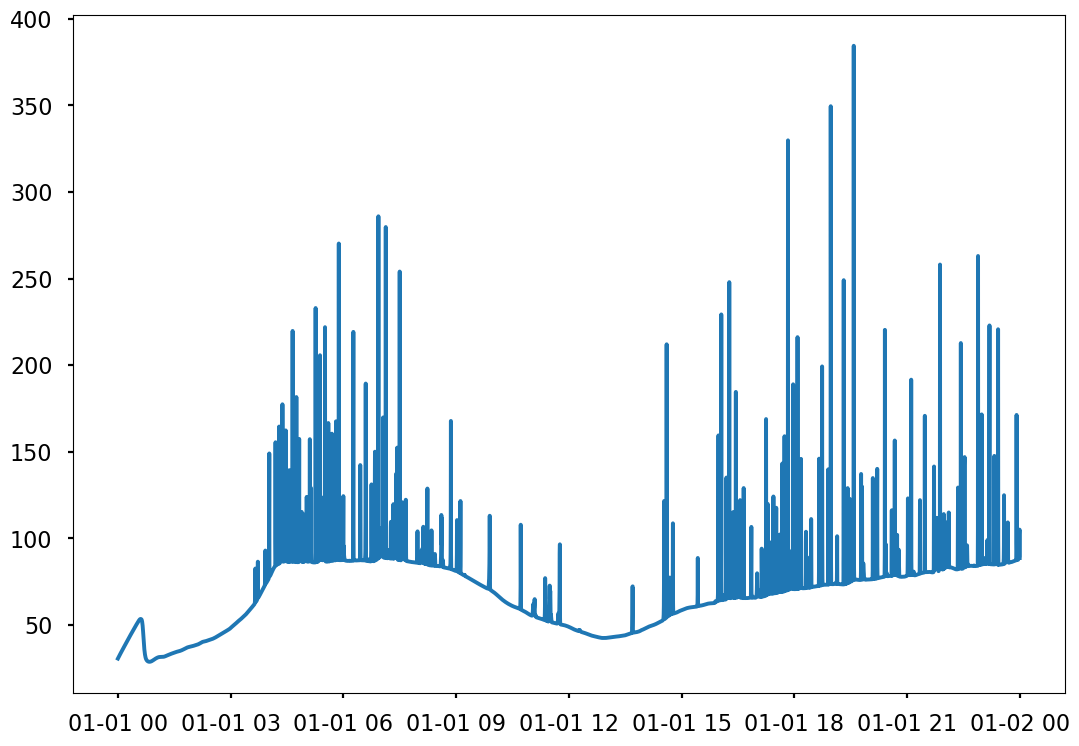

In [1]:
import xarray as xr
import glob
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
plt.rc('font', size=12) 
plt.style.use('seaborn-poster')
import sys
sys.path.append("/home/qwertz/Dokumente/N_eigene_Dokumente/Geo_Met_MSc/Semester_4_5/Thesis_prep_Juni_23/MA/Notebooks/")
from Sc_module import ucla_time2useful_time

outputdir = "/home/qwertz/Dokumente/N_eigene_Dokumente/Geo_Met_MSc/Semester_4_5/Thesis_prep_Juni_23/MA/master_plots/06_UCLA_single_runs/"

old_controle = "/home/qwertz/UCLA/uclales/Runs/CONTROLE_RUN (another copy)/"
sst_minus00 = "/home/qwertz/UCLA/uclales/Runs/00_SST_MINUS/"
sst_plus00 = "/home/qwertz/UCLA/uclales/Runs/00_SST_PLUS/"
Anto23_controle = "/home/qwertz/UCLA/uclales/Runs/Anto23_controle_(div_default)/rf01/"

######################
# Three experiments:


path = old_controle
name = "old_controle"
divergence = 2.265684e-6

#path = sst_minus00
#name = "sst_minus00"
#divergence = 2.265684e-6

#path = sst_plus00
#name = "sst_plus00"
#divergence = 2.265684e-6

#path = Anto23_controle
#name = "Anto23_controle"
#divergence = 3.5e-6

######################

ps_ds = xr.open_dataset(path+'rf01.ps.nc')
ts_ds = xr.open_dataset(path+'rf01.ts.nc', engine="netcdf4")


#print(ps_ds)
for variable in ts_ds.variables:
    print(variable," : ", ts_ds[variable].longname)
# print(ts_ds.data_vars)

plt.figure()
plt.plot(ts_ds["time"], ts_ds["lwp_bar"])
plt.savefig(outputdir+name+"_lwp.png", facecolor="white")
print(ts_ds["time"])


time  :  Time
zt  :  Vertical displacement of cell centers
zm  :  Vertical displacement of cell edges
dn0  :  Base-state density
u0  :  Geostrophic zonal wind
v0  :  Geostrophic meridional wind
fsttm  :  First sample time
lsttm  :  Last sample time
nsmp  :  Sample time counts
u  :  Zonal wind
v  :  Meridional wind
t  :  Liquid Water Potential temperature
p  :  Pressure
u_2  :  Variance of u wind
v_2  :  Variance of v wind
w_2  :  Variance of w wind
t_2  :  Variance of theta
w_3  :  Third moment of w wind
t_3  :  Third moment of theta
tot_tw  :  Total vertical flux of theta
sfs_tw  :  Sub-filter scale vertical flux of theta
tot_uw  :  Total vertical flux of u-wind
sfs_uw  :  Sub-filter scale vertical flux of u-wind
tot_vw  :  Total vertical flux of v-wind
sfs_vw  :  SGS vertical flux of v-wind
tot_ww  :  Total vertical flux of w-wind
sfs_ww  :  SGS vertical flux of v-wind
km  :  Eddy viscosity
kh  :  Eddy diffusivity
lmbd  :  Mixing lengthscale
lmbde  :  Dissipation lengthscale
sfs_tke 

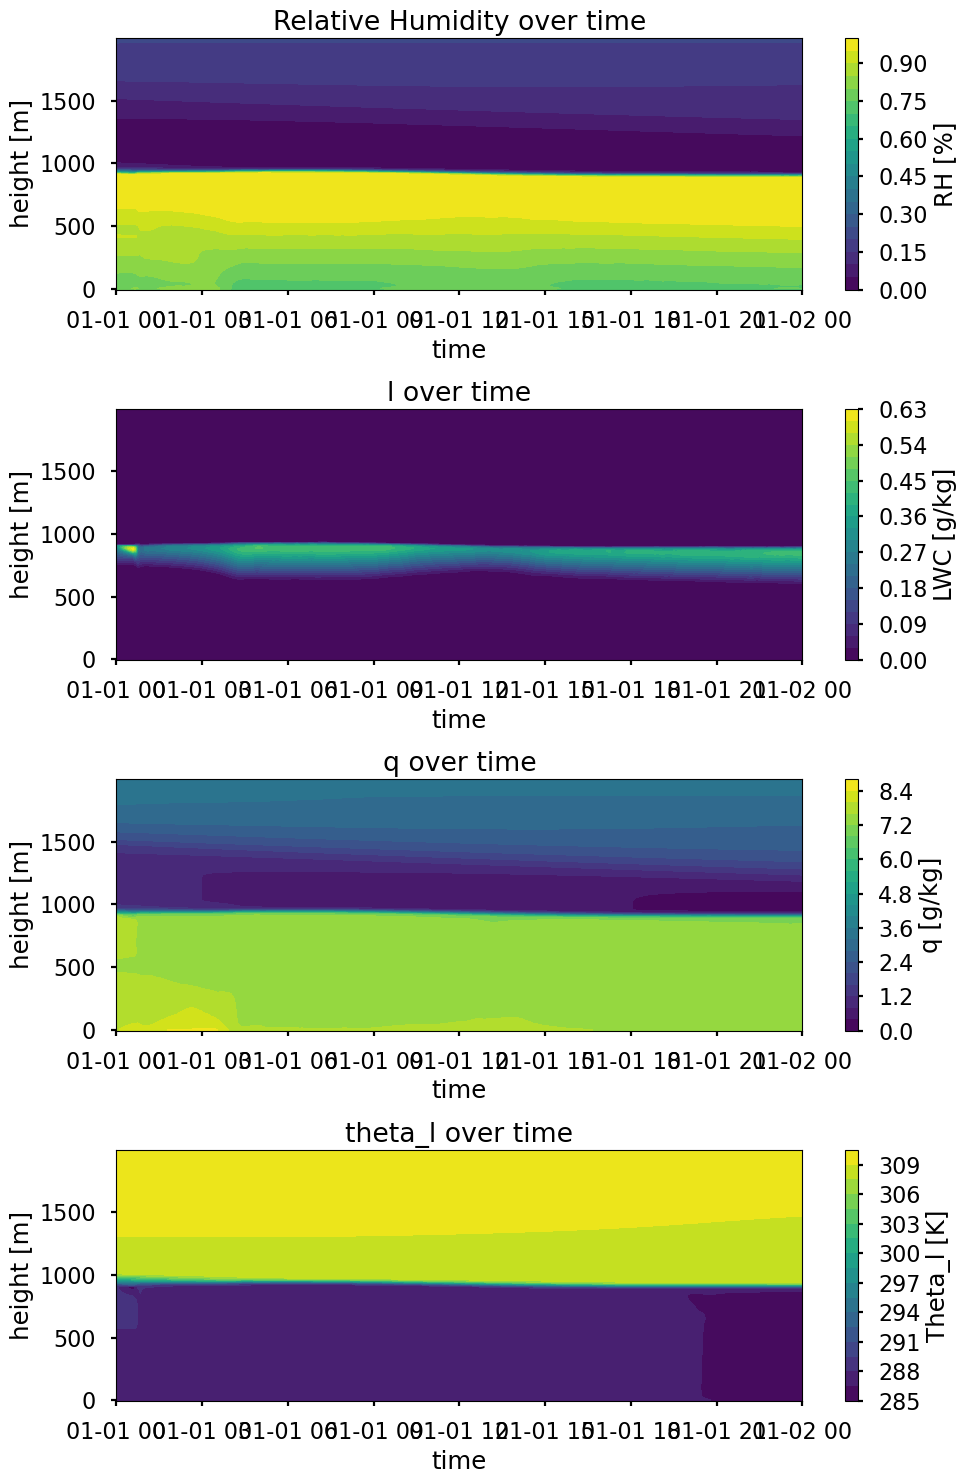

In [2]:
for variable in ps_ds.variables:
    print(variable," : ", ps_ds[variable].longname)
    
###############################
    
fig, axs = plt.subplots(4,1, figsize=(10,15))
axs[0].set_title("Relative Humidity over time")
# plt.pcolormesh(ps_ds["time"], ps_ds["zt"],ps_ds["RH"].T)
cmap1 = axs[0].contourf(ps_ds["time"], ps_ds["zt"],ps_ds["RH"].T, levels=20)
fig.colorbar(cmap1, label="RH [%]", ax=axs[0])
axs[0].set_xlabel("time")
axs[0].set_ylabel("height [m]")


axs[1].set_title("l over time")
cmap2 = axs[1].contourf(ps_ds["time"], ps_ds["zt"],ps_ds["l"].T, levels=20)
fig.colorbar(cmap2, label="LWC [g/kg]", ax=axs[1])
axs[1].set_xlabel("time")
axs[1].set_ylabel("height [m]")

axs[2].set_title("q over time")
cmap3 = axs[2].contourf(ps_ds["time"], ps_ds["zt"],ps_ds["q"].T, levels=20)
fig.colorbar(cmap3, label="q [g/kg]", ax=axs[2])
axs[2].set_xlabel("time")
axs[2].set_ylabel("height [m]")

axs[3].set_title("theta_l over time")
cmap4 = axs[3].contourf(ps_ds["time"], ps_ds["zt"],ps_ds["t"].T, levels=20)
fig.colorbar(cmap4, label="Theta_l [K]", ax=axs[3])
axs[3].set_xlabel("time")
axs[3].set_ylabel("height [m]")

plt.tight_layout()

plt.savefig(outputdir+name+"_colorplots_rh_l_q_thetal.png", facecolor="white")

2000-01-01T00:00:00.000000000
['2018-08-22T00:00:00.000000000' '2018-08-22T00:00:15.000000000'
 '2018-08-22T00:00:30.000000000' ... '2018-08-22T23:59:30.000000000'
 '2018-08-22T23:59:45.000000000' '2018-08-23T00:00:00.000000000']


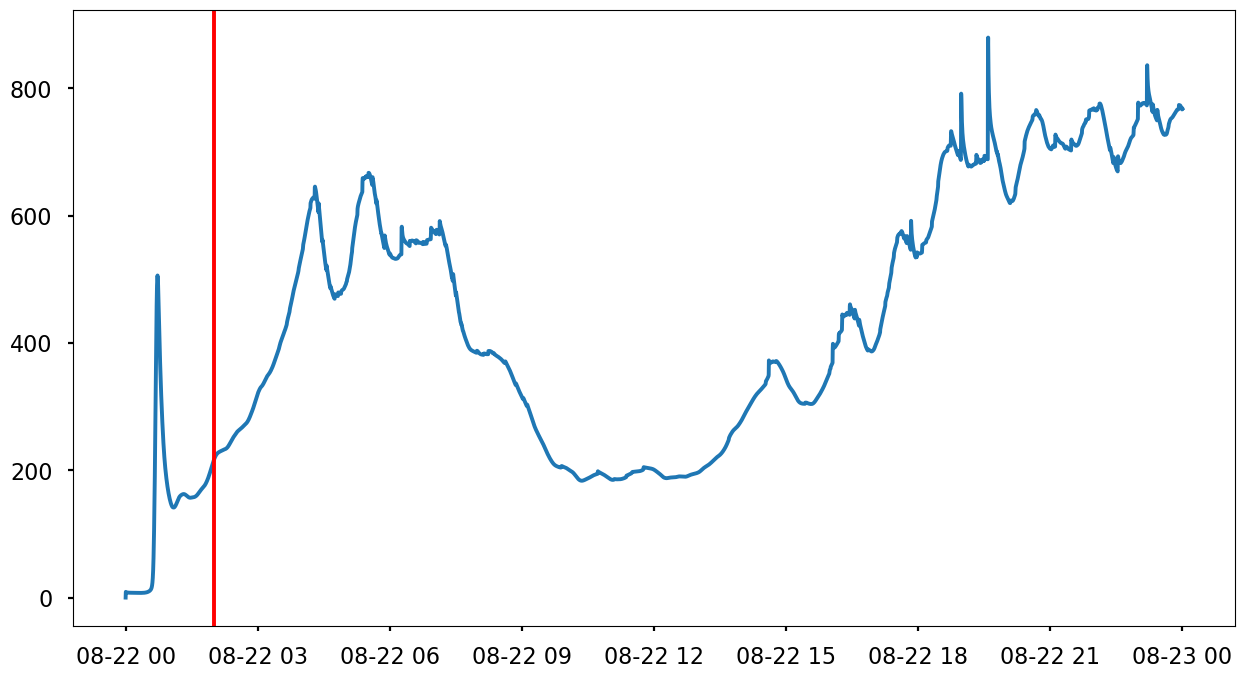

In [3]:
# Determine valid timerange:

# Monica sagte TKE balance ist eine gute Variable dafür:
# vtke  :  Vertical integral of total TKE

######################################
# Delete if it works like that:
#def ucla_time2useful_time(ucla_time):
#    # <class 'numpy.datetime64'> angeblich hat es bereits diesen Datentypen...
#    time_list = []
#    for i, timestep in enumerate(ucla_time):
#        if i>2 and str(timestep)[10:19]=="T00:00:00":
#            string = "2018-08-23"+str(timestep)[10:]
#        else:
#            string = "2018-08-22"+str(timestep)[10:]
#        time_list.append(np.datetime64(string))
#    new_time = np.array(time_list)
#    return new_time

########################################

print(ts_ds["time"].values[0])

ucla_times_np = ucla_time2useful_time(ts_ds["time"].values)
print(ucla_times_np)
plt.figure(figsize=(15,8))
plt.plot(ucla_times_np, ts_ds["vtke"].values)
plt.axvline(np.datetime64('2018-08-22T02:00:00.000000000'), color="red")
plt.savefig(outputdir+"Turbulence_balance_"+name+".png")


# ts_ds
# ps_ds

# print(ts_ds["time"].sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-02T00:00:00.000000000")).values)


In [4]:
# Get Cloudtop, cloudbase and cloudthickness

# ts.nc:
# zc  :  Cloud-top height
# zb  :  Cloud-base height
# cfrac: CF
thickness = ts_ds["zc"] - ts_ds["zb"]


##############################################

# Automatized:

# 1st: detect cloudbase from ICON (see above)

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
import sys
sys.path.append("/home/qwertz/Dokumente/N_eigene_Dokumente/Geo_Met_MSc/Semester_4_5/Thesis_prep_Juni_23/MA/Notebooks/")
from Sc_module import convert_single_timestamp
from Sc_module import convert_to_float_timestamps
# Read in Cloudnet data and think about a way to compare it with ICON:

cloudnet_path = "/home/qwertz/obs_data_MA/iqq_cloudnet/"
files = ["20180822_iquique_classification.nc","20180823_iquique_classification.nc",\
         "20180822_iquique_halo-doppler-lidar_BL-classification.nc", "20180823_iquique_halo-doppler-lidar_BL-classification.nc",\
         "20180822_iquique_halo-doppler-lidar_cloud.nc", "20180823_iquique_halo-doppler-lidar_cloud.nc",\
         "20180822_iquique_lwc-adiabatic-method.nc", "20180823_iquique_lwc-adiabatic-method.nc"]
file_icon = "/home/qwertz/data_js_icon_22_23_August_2018/stat_IQQ_all-times.nc"

ds_icon = xr.open_dataset(file_icon)
ds_class22 = xr.open_dataset(cloudnet_path+files[0])
ds_class23 = xr.open_dataset(cloudnet_path+files[1])
ds_class = xr.concat([ds_class22, ds_class23], dim="time")
ds_bl22 = xr.open_dataset(cloudnet_path+files[2])
ds_bl23 = xr.open_dataset(cloudnet_path+files[3])
ds_bl = xr.concat([ds_bl22, ds_bl23], dim="time_3min")
ds_lidar22 = xr.open_dataset(cloudnet_path+files[4])
ds_lidar23 = xr.open_dataset(cloudnet_path+files[5])
ds_lidar = xr.concat([ds_lidar22, ds_lidar23], dim="time_3min")
ds_lwp22 = xr.open_dataset(cloudnet_path+files[6])
ds_lwp23 = xr.open_dataset(cloudnet_path+files[7])
ds_lwp = xr.concat([ds_lwp22, ds_lwp23], dim="time")

#####################
# Pick timeslice:
# t_values = [20180822.0, 20180822.25, 20180822.5, 20180822.75, 20180823.0, 20180823.25, 20180823.5, 20180823.75, 20180824]

def plot_all_cloudnet_plots(begin_float=20180823.75, end_float=20180824.0, ds_icon=ds_icon, ds_class=ds_class, plot=True,\
                            ts_ds=ts_ds, name=name):
    datetime_begin = str(convert_single_timestamp(begin_float))[:19]
    datetime_end = str(convert_single_timestamp(end_float))[:19]
        
    ds_cb = ds_icon.isel(ncells=0).sel(time=slice(begin_float,end_float))
    ds_class = ds_class.sel(time=slice(datetime_begin,datetime_end))

    #####################
    low_cloudmask_cloudnet = np.squeeze([ds_class["cloud_base_height"].isel(layer=0).values<1500])
    
    #####################
    
    heights = ds_icon["z_mc"].isel(ncells=0).values
    times = [convert_single_timestamp(date) for date in ds_cb["time"].sel(time=slice(20180822.0,20180824.0)).values]

    low_cloudmask_icon = []
    cloudbases_icon = []
    cloudtops_icon = []
    for i, timestep in enumerate(times):
        base_found = False
        top_found = False
    
        #print("\n\n",i, timestep, "\n")
        
        for j, height in enumerate(heights): 
            qc_value = ds_cb["qc"].values[i,j]
            if j > len(heights)-2:
                if not base_found:
                    cloudbases_icon.append(np.nan)
                    low_cloudmask_icon.append(False)
                else:
                    if cloudbases_icon[i]<1500:
                        low_cloudmask_icon.append(True)
                    else:
                        low_cloudmask_icon.append(False)
                    #print("base added1!!")
                if not top_found:
                    cloudtops_icon.append(np.nan)
                    #print("top added1!!!")
                break
                
            if qc_value>0 and ds_cb["qc"].values[i,j+1]>0 and ds_cb["qc"].values[i,j-1]==0 and \
                    ds_cb["qc"].values[i,j-2]==0 and not top_found:
                #print("first case (top): ",height)
                top_found = True
                cloudtops_icon.append(height)
                #print("base added2!!")
                
            elif qc_value==0 and ds_cb["qc"].values[i,j+1]==0 and ds_cb["qc"].values[i,j-1]>0 and \
                    ds_cb["qc"].values[i,j-2]>0 and not base_found:
                #print("second case (base): ",height)
                base_found = True
                cloudbases_icon.append(height)

    # Exit for FOCs:
    if not plot:            
        return low_cloudmask_icon, low_cloudmask_cloudnet, datetime_begin, datetime_end
    #####################
    # print(ds_cb)
    
    # 3rd: Make timeseries of both compared to cloudnet
    plt.figure(figsize=(15,8))
    plt.title("Cloud base height in ICON and Cloudnet\n timeseries for "+\
              datetime_begin+" to "+datetime_end)
    plt.scatter(ds_class["time"],ds_class["cloud_base_height"], label="cloud base cloudnet", marker="X", color="blue")
    plt.scatter(times, cloudbases_icon, label="cloud base ICON", marker="X", color="red")
    plt.xlabel("time [UTC]", fontsize=12) 
    plt.ylabel("height [m]", fontsize=12) 
    plt.legend()
    plt.ylim(0,1000)
    plt.tight_layout()
    # plt.savefig(outputdir+datetime_begin+" to "+datetime_end+"_cloudbases_UCLA.png")
    plt.close()
    
    plt.figure(figsize=(15,8))
    plt.title("Cloud top height in ICON and Cloudnet\n timeseries for "+\
              datetime_begin+" to "+datetime_end)
    plt.scatter(ds_class["time"],ds_class["cloud_top_height"], label="cloud top cloudnet", marker="X", color="blue")
    plt.scatter(times, cloudtops_icon, label="cloud top ICON", marker="X", color="red")
    plt.xlabel("time [UTC]", fontsize=12) 
    plt.ylabel("height [m]", fontsize=12) 
    plt.legend()
    plt.ylim(0,1500)
    plt.tight_layout()
    # plt.savefig(outputdir+datetime_begin+" to "+datetime_end+"_cloudtops_UCLA.png")
    plt.close()
    
    ###################################################################
    # Differenz berechnen:
    
    differences_cb = []
    differences_cth = []
    bias_cb = []
    bias_cth = []
    for i, (timestep, cb_icon) in enumerate(zip(times, cloudbases_icon)):
        # Finde den zeitlich nächsten Index im Array ds_class["time"]
        nearest_index = np.argmin(np.abs(ds_class["time"].values - timestep))
        # Finde den Wert von ds_class["cloud_base_height"] an diesem Index
        nearest_cb = ds_class["cloud_base_height"].values[nearest_index]  
        differences_cb.append(abs(nearest_cb - cb_icon))
        bias_cb.append(cb_icon - nearest_cb )
    
        nearest_cth = ds_class["cloud_top_height"].values[nearest_index]
        differences_cth.append(abs(nearest_cth - cloudtops_icon[i]))
        bias_cth.append(cloudtops_icon[i] - nearest_cth )
        
    plt.figure(figsize=(15,8))
    plt.title("Difference of cloud base height cb between ICON and Cloudnet\n timeseries for "+\
              datetime_begin+" to "+datetime_end)
    plt.scatter(times, differences_cb, label="cloud base difference", marker="X",color="red")
    plt.xlabel("time [UTC]", fontsize=12) 
    plt.ylabel("difference [m]", fontsize=12) 
    plt.legend()
    plt.ylim(0,500)
    plt.tight_layout()
    # plt.savefig(outputdir+datetime_begin+" to "+datetime_end+"_cloudbase_differences_UCLA.png")
    plt.close()
    
    plt.figure(figsize=(15,8))
    mean_bias_cb = np.nanmean(bias_cb)
    plt.title("Bias of cloud base height cb: ICON - Cloudnet (mean: "+str(mean_bias_cb)+")\n timeseries for "+\
              datetime_begin+" to "+datetime_end)
    plt.scatter(times, bias_cb, label="cloud base bias", marker="X",color="red")
    plt.xlabel("time [UTC]", fontsize=12) 
    plt.ylabel("bias [m]", fontsize=12) 
    plt.legend()
    plt.axhline(0, color='black', linewidth=0.5)
    plt.ylim(-500,500)
    plt.tight_layout()
    # plt.savefig(outputdir+datetime_begin+" to "+datetime_end+"_cloudbase_bias_UCLA.png")
    plt.close()
    
    plt.figure(figsize=(15,8))
    plt.title("Difference of Cloud top height cth between ICON and Cloudnet\n timeseries for "+\
              datetime_begin+" to "+datetime_end)
    plt.scatter(times, differences_cth, label="cloud top difference",marker="X", color="red")
    plt.xlabel("time [UTC]", fontsize=12) 
    plt.ylabel("difference [m]", fontsize=12) 
    plt.legend()
    plt.ylim(0,500)
    plt.tight_layout()
    # plt.savefig(outputdir+datetime_begin+" to "+datetime_end+"_cloudtop_differences_UCLA.png")
    plt.close()
    
    plt.figure(figsize=(15,8))
    mean_bias_top = np.nanmean(bias_cth)
    plt.title("Bias of cloud top height: ICON - Cloudnet (mean: "+str(mean_bias_top)+")\n timeseries for "+\
              datetime_begin+" to "+datetime_end)
    plt.scatter(times, bias_cth, label="cloud top bias",marker="X", color="red")
    plt.xlabel("time [UTC]", fontsize=12) 
    plt.ylabel("bias [m]", fontsize=12) 
    plt.legend()
    plt.axhline(0, color='black', linewidth=0.5)
    plt.ylim(-500,500)
    plt.tight_layout()
    # plt.savefig(outputdir+datetime_begin+" to "+datetime_end+"_cloudtop_bias_UCLA.png")
    plt.close()
    
    ##############################################################
    # Wolkendicke berechnen!
    h_icon = []
    for i in range(len(cloudtops_icon)):
        h_icon.append(cloudtops_icon[i]- cloudbases_icon[i])
    h_cloudnet = ds_class["cloud_top_height"]-ds_class["cloud_base_height"]
    
    plt.figure(figsize=(15,8))
    plt.title("cloud thickness h for ICON data and Cloudnet\n timeseries for "+\
              datetime_begin+" to "+datetime_end)
    plt.scatter(times, h_icon, label="cloud thickness ICON", marker="X", color="red")
    plt.scatter(ds_class["time"], h_cloudnet, label="cloud thickness Cloudnet", marker="X", color="blue")
    plt.xlabel("time [UTC]", fontsize=12) 
    plt.ylabel("h [m]", fontsize=12) 
    plt.ylim(0,1000)
    plt.legend()
    plt.tight_layout()
    # plt.savefig(outputdir+datetime_begin+" to "+datetime_end+"_cloud_thickness_h_UCLA.png")
    plt.close()

    #############################################
    # Interpolate icon data on foghat heights:
    interp_func = interp1d(convert_to_float_timestamps(ds_class["time"].values), h_cloudnet.values[:,0])
    # interpolated_cloudnet_hs = interp_func(convert_to_float_timestamps(times[1:]))
    # interpolate error
    #############################################
    
    plt.figure(figsize=(15,8))
    # mean_bias_h = np.nanmean( h_icon[1:]-interpolated_cloudnet_hs)
    # plt.title("Bias for cloud thickness h for ICON - Cloudnet (mean: "+str(mean_bias_h)+")\n timeseries for "+\
    #          datetime_begin+" to "+datetime_end)
    # plt.scatter(times[1:], h_icon[1:]-interpolated_cloudnet_hs, label="cloud thickness ICON", marker="X", color="red")
    plt.xlabel("time [UTC]", fontsize=12) 
    plt.ylabel("h [m]", fontsize=12) 
    plt.ylim(-500,500)
    plt.legend()
    plt.tight_layout()
    # plt.savefig(outputdir+datetime_begin+" to "+datetime_end+"_cloud_thickness_bias_UCLA.png")
    plt.close()
    
    ###############################
    # 4th make boxplots for cb and ctop:
    # und von der Wolkendicke natürlich
    # Und difference?
    
    def remove_nans(arr):
        arr = np.array(arr)
        cleaned_arr = arr[~np.isnan(arr)]
        return cleaned_arr
    
    ###############################################
    # Diese Boxplots habe ic gerade im ylimi of 1500 gesetzt, die Oberkante sieht man in Daten von
    # Cloudnet aber trotzdem nicht immer...

    # zc  :  Cloud-top height
    # zb  :  Cloud-base height
    # cfrac: CF
    thickness = ts_ds["zc"] - ts_ds["zb"]
    
    plt.figure(figsize=(10,10))
    plt.title("cloud thickness h derived by Cloudnet, ICON and UCLA\n boxplot for "+\
              datetime_begin+" to "+datetime_end, fontsize=12) 
    plt.boxplot([remove_nans(h_cloudnet.isel(layer=0).values), remove_nans(h_icon),\
                 remove_nans(thickness.sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-02T00:00:00.000000000")).values)],\
                labels = ["h Cloudnet", "h ICON", "h UCLA"],\
                whis=(0, 100))#, fontsize=12) 
    plt.ylabel("cloud thickness h [m]", fontsize=12) 
    plt.ylim(0,1500)
    plt.tight_layout()
    plt.savefig(outputdir+datetime_begin+" to "+datetime_end+"_boxplot_cloud_thickness_UCLA"+name+".png")
    plt.close()
    
    plt.figure(figsize=(10,10))
    plt.title("cloud top height cth derived by Cloudnet, ICON and UCLA\n boxplot for "+\
              datetime_begin+" to "+datetime_end, fontsize=12) 
    plt.boxplot([remove_nans(ds_class["cloud_top_height"].isel(layer=0).values),remove_nans(cloudtops_icon),\
                 remove_nans(ts_ds["zc"].sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-02T00:00:00.000000000")).values)],\
                labels = ["cth Cloudnet", "cth ICON", "cth UCLA"], whis=(0, 100))#, fontsize=12) 
    ##############################
    print("mean cloudtop cloudnet: ",np.nanmean(ds_class["cloud_top_height"].isel(layer=0).values))
    print("mean cloudtop ICON: ",np.nanmean(cloudtops_icon))
    ##################################
    plt.ylabel("cloud top height [m]", fontsize=12) 
    plt.ylim(0,1500)
    plt.tight_layout()
    plt.savefig(outputdir+datetime_begin+" to "+datetime_end+"_boxplot_cloudtops_UCLA"+name+".png")
    plt.close()
    
    plt.figure(figsize=(10,10))
    plt.title("cloud base height cb derived by Cloudnet, ICON and UCLA\n boxplot for "+\
              datetime_begin+" to "+datetime_end, fontsize=12) 
    plt.boxplot([remove_nans(ds_class["cloud_base_height"].isel(layer=0).values),remove_nans(cloudbases_icon),\
                 remove_nans(ts_ds["zb"].sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-02T00:00:00.000000000")).values)],\
                labels = ["cb Cloudnet", "cb ICON", "cb UCLA"], whis=(0, 100))#, fontsize=12) 
    plt.ylabel("cloud base height [m]", fontsize=12) 
    plt.ylim(0,1500)
    plt.tight_layout()
    plt.savefig(outputdir+datetime_begin+" to "+datetime_end+"_boxplot_cloudbases_UCLA"+name+".png")
    plt.close()
    
    return low_cloudmask_icon, low_cloudmask_cloudnet, datetime_begin, datetime_end

###############################################################
begin_float = 20180822.0
end_float = 20180824.0
low_cloudmask_icon, low_cloudmask_cloudnet, datetime_begin, datetime_end =\
        plot_all_cloudnet_plots(begin_float=begin_float, end_float=end_float, ts_ds=ts_ds)

unique_icon, counts_icon = np.unique(low_cloudmask_icon, return_counts=True)
unique_cloudnet, counts_cloudnet = np.unique(low_cloudmask_cloudnet, return_counts=True)

##################################################################
# Where starts the valid timeframe for UCLA data?XXX
# Add FOCs!


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


mean cloudtop cloudnet:  1058.7656
mean cloudtop ICON:  765.7189754017612


In [5]:
# Get LWP

# ts.nc:
# lwp_bar  :  Liquid-water path
# lwp_var  :  Liquid-water path variance

In [6]:
# Calculate Richardson Numbers

# ps.nc: time: 289, zt: 180
# u  :  Zonal wind
# v  :  Meridional wind
# zt  :  Vertical displacement of cell centers
# zm  :  Vertical displacement of cell edges
# t  :  Liquid Water Potential temperature
# p  :  Pressure

import sys
sys.path.append("/home/qwertz/Dokumente/N_eigene_Dokumente/Geo_Met_MSc/Semester_4_5/Thesis_prep_Juni_23/MA/Notebooks/")
from Sc_module import calc_Ri_bulk

##################################
# Calculate

ris = np.zeros([len(ps_ds["time"]),len(ps_ds["zt"])])
for i, timestep in enumerate(ps_ds["time"].values):
    theta_s = ps_ds["t"].values[i,0]

    for j, z in enumerate(ps_ds["zt"].values):
        theta_z = ps_ds["t"].values[i,j]
        uz = ps_ds["u"].values[i,j]
        vz = ps_ds["v"].values[i,j]
        ris[i,j] = calc_Ri_bulk(theta_s, theta_z, uz, vz)



In [7]:
##################################
# Save to file:

new_file = path+"richardson_numbers_"+name+".nc"
ds_theta_v = xr.Dataset({"u": (("time", "height"), ps_ds["u"].values),"v": (("time", "height"), ps_ds["v"].values),\
                         "theta_l": (("time", "height"), ps_ds["t"].values),"Ri": (("time", "height"),ris),},\
                         coords={"time": ps_ds["time"].values,"height": ps_ds["zt"].values,})
ds_theta_v.to_netcdf(new_file)



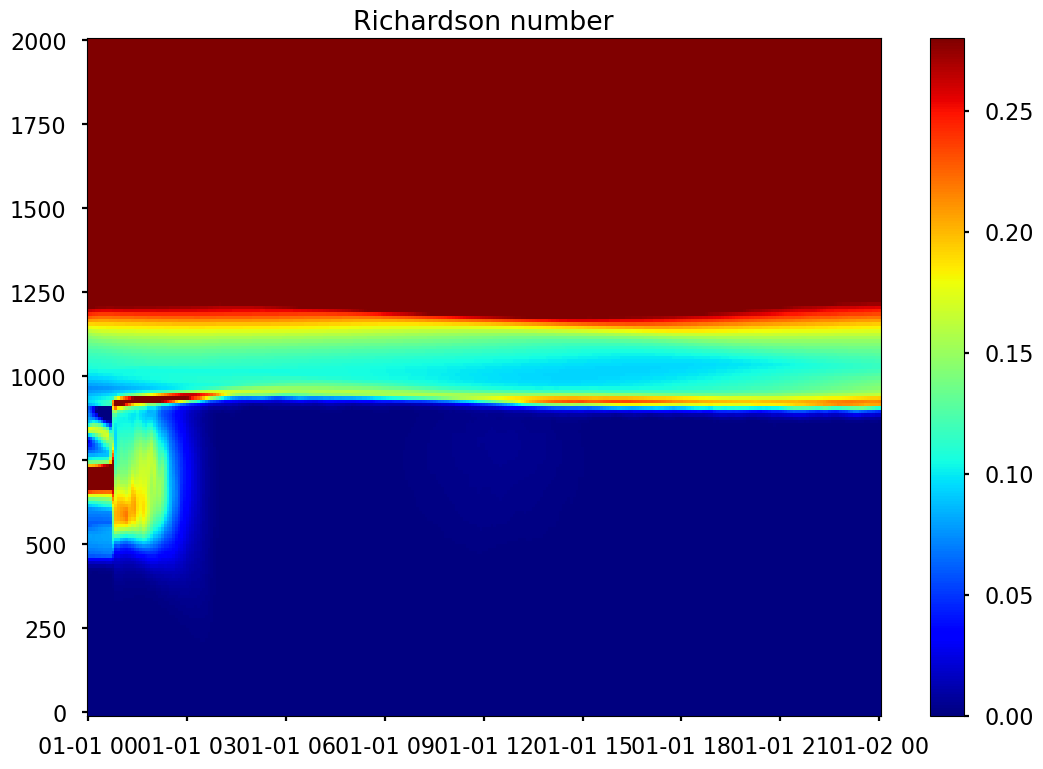

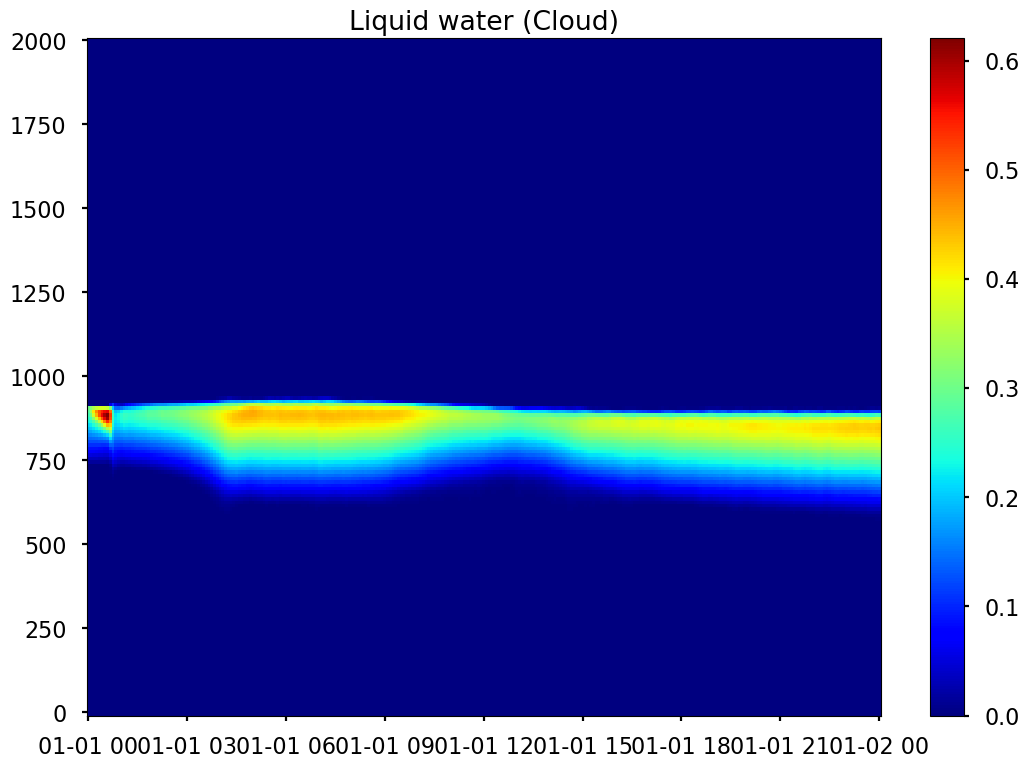

In [8]:
###################################
# Plot:

plt.figure()
plt.title("Richardson number")
plt.pcolormesh(ps_ds["time"].values,ps_ds["zt"].values,ris.T, vmin = 0, vmax = 0.28, cmap="jet")
plt.colorbar()

plt.figure()
plt.title("Liquid water (Cloud)")
plt.pcolormesh(ps_ds["time"].values,ps_ds["zt"].values,ps_ds["l"].values.T, cmap="jet")
plt.colorbar()

In [9]:
# Nocheinmal mit UCLA:
ri_ucla_file = path+"richardson_numbers_"+name+".nc"

# 4 Plots für 4 Profile:
##############################################################

import xarray as xr
from scipy.interpolate import interp1d
from Sc_module import write_sounding_string
import subprocess

#########################################################

def convert_julian_to_datetime(julian_array):
    # Konvertiere den Julian-Tag in Unix-Zeitstempel
    unix_times = (julian_array - 2440587.5) * 86400
    
    # Konvertiere Unix-Zeitstempel in Datumszeichenfolgen im ISO-Format
    date_strings = []
    for unix_time in unix_times:
        command = f"date -ud '@{int(unix_time)}' +'%Y-%m-%d %H:%M:%S'"
        result = subprocess.run(command, shell=True, capture_output=True, text=True)
        if result.returncode == 0:
            date_strings.append(result.stdout.strip())
        else:
            raise ValueError("Fehler beim Konvertieren des Unix-Zeitstempels.")
    
    # Konvertiere Datumszeichenfolgen in np.datetime64-Objekte
    datetime_array = np.array(date_strings, dtype='datetime64')
    
    return datetime_array

##############################################################
def convert_single_datatime2float(ts):
    ts_str = str(ts)
    day_str = ts_str[:10]
    hour = int(ts_str[11:13])
    minute = int(ts_str[14:16])
    second = int(ts_str[17:19])
    try:
        microsecond = int("0."+ts_str[20:])
    except:
        microsecond = 0.
                
    # Berechnung des Float-Zeitstempels
    float_ts = float(day_str[:4])*10000+float(day_str[5:7])*100+float(day_str[8:10]) + \
                       (hour * 3600 + minute * 60 + second + microsecond) / 86400
    return float_ts

#####################################################################
# Add wind profiles from AMDAR:

# Einlesen neuer Winddaten von Amdar / GSD / IQQ:

import matplotlib.pyplot as plt
import pandas as pd
from bs4 import BeautifulSoup
import glob
import numpy as np
from scipy.interpolate import interp2d
from scipy.interpolate import RectBivariateSpline
import sys
sys.path.append("/home/qwertz/Dokumente/N_eigene_Dokumente/Geo_Met_MSc/Semester_4/Thesis_prep_Juni_23/Porject_Work/")
from Sc_module import convert_to_float_timestamps
from Sc_module import convert_single_timestamp

###########################################

def read_pandas_dataframe_from_html(filepath):
    html_table = open(filepath,"r").read()
    
    soup = BeautifulSoup(html_table, 'html.parser')
    
    # Die Daten aus der Tabelle extrahieren
    data = []
    for row in soup.find_all('tr'):
        row_data = []
        for cell in row.find_all(['th', 'td']):
            row_data.append(cell.get_text(strip=True))
        data.append(row_data)
    columns = data[0] # Die Spaltenüberschriften festlegen
    data = data[1:] # Die Daten ohne die Spaltenüberschriften extrahieren
    df = pd.DataFrame(data, columns=columns) # DataFrame erstellen

    return df

#######################################################
# DMC wind:

pfad_dmc = "/home/qwertz/obs_data_MA/amdar/dmc/"
dmc_files = ["dmc_amdar_20180822_150km.txt", "dmc_amdar_20180822.txt", "dmc_amdar_20180823.txt"]

df_dmc22_150 = read_pandas_dataframe_from_html(pfad_dmc+dmc_files[0])
df_dmc22 = read_pandas_dataframe_from_html(pfad_dmc+dmc_files[1])
df_dmc23  = read_pandas_dataframe_from_html(pfad_dmc+dmc_files[2])

##########################

def add_datetimes2dataframe(df, datetstring="2018-08-22T"):
    # Add timestamps:
    datetimes = []
    for timestring in df["Hora"].values:
        datetime = np.datetime64(datetstring+timestring+":00")
        datetimes.append(datetime)

    df["datetime"] = datetimes
    return df

##########################

print("Windspeed from Amdar is assumed to be in kt!!!")

def convert_deg_speed2uv_wind(df):
    # kt => m/s (???)
    us = []
    vs = []
    for direction, speed in zip(df["Direccion Viento"].values, df["Intensidad Viento"].values):
        ui = float(speed) * np.sin(np.deg2rad(float(direction))) * 0.5144444
        vi = float(speed) * np.cos(np.deg2rad(float(direction))) * 0.5144444
        us.append(ui)
        vs.append(vi)
        
    df["u"] = us
    df["v"] = vs
    return df

##########################
# Add datetimes:
df_dmc22 = add_datetimes2dataframe(df_dmc22, datetstring="2018-08-22T")
df_dmc23 = add_datetimes2dataframe(df_dmc23, datetstring="2018-08-23T")

###
# Convert wind:
df_dmc22 = convert_deg_speed2uv_wind(df_dmc22)
df_dmc23 = convert_deg_speed2uv_wind(df_dmc23)

###
# Erzeuge Windprofile für Plots: maximale Distanz 30 km; maximale Höhe: 3000 m
df_completa = pd.concat([df_dmc22, df_dmc23])
df_completa["Altitud"] = df_completa["Altitud"].astype(float)
df_completa.sort_values(by='datetime', inplace=True)
for i, value in enumerate(df_completa["Distancia Mts"].values):
    df_completa["Distancia Mts"].values[i] = value.replace(",", ".")
df_completa["Distancia Mts"] = df_completa["Distancia Mts"].astype(float)
# df_filtered1 = df_completa[df_completa["Altitud"] <= 3000]
df_filtered = df_completa[df_completa["Distancia Mts"] <= 30]

####
plt.figure(figsize=(9,6))
plt.title("Data coverage in time and height at Iquique: Measurements of wind speed by airplanes")
plt.xlabel("time UTC")
plt.ylabel("height [m]")
plt.scatter(df_filtered["datetime"].values, df_filtered["Altitud"].values)
plt.ylim(0,4000)
# plt.savefig(outputdir+"AMDAR_datacoverage.png")
###
# Unterteile dies in 4 Profile
df_profile1 = df_filtered[df_filtered["datetime"] < np.datetime64('2018-08-22T11:00:00.000000000')]
df_profile2 = df_filtered[(np.datetime64('2018-08-22T11:00:00.000000000') < df_filtered["datetime"]) &\
    (df_filtered["datetime"] < np.datetime64('2018-08-23T01:00:00.000000000'))]
df_profile3 = df_filtered[(np.datetime64('2018-08-23T01:00:00.0') < df_filtered["datetime"]) &\
    (df_filtered["datetime"]< np.datetime64('2018-08-23T17:17:00.000000000'))]
df_profile4 = df_filtered[(np.datetime64('2018-08-23T21:00:00.000000000') < df_filtered["datetime"]) &\
    (df_filtered["datetime"]< np.datetime64('2018-08-23T23:50:00.000000000'))]

###

#######################################################
# Pfad: /home/qwertz/obs_data_MA/amdar/
# Dateien:
# dataAMDAR_ricardo_munoz_de.htm
#  datosAMDAR_ricardo_munoz.htm



#####################################################################

def plot_average_Ri_profile(begin_float=20180822.0, end_float=20180824.0, wind_df="", maxlevel=23, ri_ucla_file=ri_ucla_file, name=name):
    ds_ri = xr.open_dataset(ri_ucla_file) 
    datetime_begin = str(convert_single_timestamp(begin_float))[:19]
    datetime_end = str(convert_single_timestamp(end_float))[:19]
    
    # Icon:
    file_icon = "/home/qwertz/data_js_icon_22_23_August_2018/stat_IQQ_all-times.nc"
    ds_icon = xr.open_dataset(file_icon)
    
    # Foghat Daten zu Profil:
    ds_theta_v4 = xr.open_dataset("/home/qwertz/obs_data_MA/iqq_foghat/theta_v_spec_hum_iqq_22_23apschera20240304.nc")
    file_wind22 = "/home/qwertz/obs_data_MA/iqq_lidar_halo/22/wind_vad-24_20180822.nc"
    file_wind23 = "/home/qwertz/obs_data_MA/iqq_lidar_halo/23/wind_vad-24_20180823.nc"
    ds_wind = xr.open_mfdataset([file_wind22, file_wind23])# # t Kelvin / less timesteps...
    ds_foghat_reduced4 = ds_theta_v4.sel(time=slice(datetime_begin, datetime_end)).mean("time")
    datetime_array = convert_julian_to_datetime(ds_wind["time"].values)
    ds_wind = ds_wind.assign_coords(time=("time", datetime_array))

    ######################################################
    # Interpolation of wind lidar to Foghat height levels:
    interp_func_u = interp1d(ds_wind["height"].values,\
                           np.nanmean(ds_wind["wind_vec"].sel(time=slice(datetime_begin, datetime_end)), axis=2)[0,:])
    interp_func_v = interp1d(ds_wind["height"].values,\
                           np.nanmean(ds_wind["wind_vec"].sel(time=slice(datetime_begin, datetime_end)), axis=2)[1,:])
    us = interp_func_u(ds_foghat_reduced4["height"].values[1:])
    vs = interp_func_v(ds_foghat_reduced4["height"].values[1:])

    #######################################################
    # Interpolation of airplane data to Foghat height levels:
    interp_func_u = interp1d(wind_df["Altitud"].values, wind_df["u"].values)
    interp_func_v = interp1d(wind_df["Altitud"].values, wind_df["v"].values)
    us_plane = interp_func_u(ds_foghat_reduced4["height"].values[1:maxlevel])
    vs_plane = interp_func_v(ds_foghat_reduced4["height"].values[1:maxlevel])
    
    ###########################
    # Derive Ris and PBL heights:
    pbl_height4 = np.nan
    ris_foghat4 = []
    theta_s4 = ds_foghat_reduced4["theta_v"].values[0]
    switch =False
    windswitch = False
    for i, level in enumerate(ds_foghat_reduced4["height"].values[:maxlevel]):
        if i==len(ds_foghat_reduced4["height"].values)-1:
            break
        theta_z4 = ds_foghat_reduced4["theta_v"].values[i]
        ########
        if i==0:
            uz = us[i]
            vz = vs[i]
        elif np.isnan(us[i-1]) and np.isnan(vs[i-1]):
            uz = us_plane[i-1]
            vz = vs_plane[i-1]
            if not windswitch:
                firstlevel = i
                windswitch = True
        else:
            uz = us[i-1]
            vz = vs[i-1]
        # print("Level: ", level, " m - theta surface:", theta_s4," theta z: ", theta_z4, " u: ", uz," v: ", vz)
        #######
        ris_foghat4.append(calc_Ri_bulk(theta_s4, theta_z4, uz, vz))
        if 0.28>ris_foghat4[i-1] and ris_foghat4[i]>0.28 and not switch:
            pbl_height4 = ds_foghat_reduced4["height"].values[i]
            switch = True


    # Derive ICON profile:
    ds_icon_reduced = ds_icon.isel(ncells=0).sel(time=slice(begin_float, end_float)).mean("time")
    
    ris_icon = []
    theta_s = ds_icon_reduced["theta_v"].values[199]
    for i, level in enumerate(ds_icon_reduced["height"].values):
        theta_z = ds_icon_reduced["theta_v"].values[i]
        uz = ds_icon_reduced["u"].values[i]
        vz = ds_icon_reduced["v"].values[i]
        ris_icon.append(calc_Ri_bulk(theta_s, theta_z, uz, vz))
        if ris_icon[i-1]>0.28 and ris_icon[i]<0.28:
            pbl_height = ds_icon_reduced["z_mc"].values[i-1]
            # print(i,": Ri threshold level: ", ds_icon_reduced["z_mc"].values[i], " m")

    #### Write sounding for UCLA inputs:
    write_sounding_string(ps=ds_foghat_reduced4["p"].values[0], zs=ds_foghat_reduced4["height"].values,\
                          Thetas=ds_foghat_reduced4["theta_l"].values,\
                          qs=(ds_foghat_reduced4["q"].values)*1000, us=np.concatenate((us[:firstlevel-1],us_plane[firstlevel:])),\
                          vs=np.concatenate((vs[:firstlevel-1],vs_plane[firstlevel:])), zmax=5000,
                         filename = "sound_in_IQQ"+str(datetime_begin))

    #####################
    #Prepare UCLA data:
    ris_ucla_reduced = ds_ri.sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-02T00:00:00.000000000"))\
        .mean("time")["Ri"].values[1:]
    theta_ucla_reduced = ds_ri.sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-02T00:00:00.000000000"))\
        .mean("time")["theta_l"].values[1:]
    us_ucla = ds_ri.sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-02T00:00:00.000000000"))\
        .mean("time")["u"].values[1:]
    vs_ucla = ds_ri.sel(time=slice("2000-01-01T02:00:00.000000000", "2000-01-02T00:00:00.000000000"))\
        .mean("time")["v"].values[1:]
    wind_ucla_reduced = np.linalg.norm([us_ucla, vs_ucla], axis=0)
    
    ########################################
    # Plot data:
    plt.title("Profile of Bulk Richardson Number in Iquique\n betweeen "+str(datetime_begin)+" and "+str(datetime_end))
    plt.plot(ris_icon, ds_icon_reduced["z_mc"].values, label="ICON", marker="X", color="red")
    plt.plot(ris_foghat4[:firstlevel], ds_foghat_reduced4["height"].values[:firstlevel],\
                label="Foghat - Wind data by Lidar", marker="X", color="blue")    
    plt.plot(ris_ucla_reduced, ds_ri["height"].values[1:],\
                label="UCLA "+name, marker="X", color="green")
    plt.plot(ris_foghat4[firstlevel-1:], ds_foghat_reduced4["height"].values[firstlevel-1:maxlevel],\
             label="Foghat - Wind data by AMDAR",\
             marker="o",linestyle="dotted", color="blue")
    plt.ylabel("height [m]", fontsize=12) 
    plt.xlabel("Bulk Richardson number Ri", fontsize=12) 
    plt.ylim(0,1500)
    plt.xlim(-0.2,1.5)
    # plt.axvline(0, color="black", alpha=0.4)
    plt.axhline(pbl_height, color="black", label="PBL height by Ri threshold")
    plt.axhline(pbl_height4, color="black")
    plt.legend()
    
    plt.tight_layout()
    plt.savefig(outputdir+str(datetime_begin)+"_"+str(datetime_end)+"Ri_mean_profile_UCLA"+name+".png",\
                facecolor="white")
    plt.close()

    
    # Establish Subplots:
    fig, axs = plt.subplots(1,3, figsize=(15,9))
    fig.suptitle("Atmospheric profiles in Iquique\n betweeen "+str(datetime_begin)+" and "+str(datetime_end))

    # First panel:
    axs[0].set_title("Bulk Richardson Number")
    axs[0].plot(ris_icon, ds_icon_reduced["z_mc"].values, label="ICON", marker="X", color="red")
    axs[0].plot(ris_ucla_reduced, ds_ri["height"].values[1:],\
                label="UCLA "+name, marker="X", color="green")
    axs[0].plot(ris_foghat4[:firstlevel], ds_foghat_reduced4["height"].values[:firstlevel],\
                label="Foghat - Wind data by Lidar", marker="X", color="blue")
    axs[0].plot(ris_foghat4[firstlevel-1:], ds_foghat_reduced4["height"].values[firstlevel-1:maxlevel],\
             label="Foghat - Wind data by AMDAR",\
             marker="o",linestyle="dotted", color="blue")
    axs[0].set_ylabel("height [m]", fontsize=12) 
    axs[0].set_xlabel("Bulk Richardson number Ri", fontsize=12) 
    axs[0].set_ylim(0,1500)
    axs[0].set_xlim(-0.2,1.5)
    # plt.axvline(0, color="black", alpha=0.4)
    axs[0].axhline(pbl_height, color="black", label="PBL height by Ri threshold")
    axs[0].axhline(pbl_height4, color="black")
    axs[0].legend()

    # 2nd Panel: Theta
    axs[1].set_title("Virtual Potential Temperature $\Theta_v$")
    axs[1].plot(ds_foghat_reduced4["theta_v"].values, ds_foghat_reduced4["height"].values, color="blue", label="Foghat")
    axs[1].plot(ds_icon_reduced["theta_v"].values, ds_icon_reduced["z_mc"].values, color="red", label="ICON")
    axs[1].plot(theta_ucla_reduced, ds_ri["height"].values[1:],\
                label="UCLA "+name, marker="X", color="green")
    axs[1].set_ylabel("height [m]", fontsize=12) 
    axs[1].set_xlabel("Theta", fontsize=12) 
    axs[1].set_ylim(0,1500)
    axs[1].set_xlim(280, 320)
    axs[1].legend()    
    
    # 3rd Panel: Wind
    wind_lidar = np.linalg.norm([us, vs], axis=0)
    wind_plane = np.linalg.norm([us_plane, vs_plane], axis=0)
    wind_icon = np.linalg.norm([ds_icon_reduced["u"].values, ds_icon_reduced["v"].values], axis=0)
    axs[2].set_title("Wind speed")
    axs[2].plot(wind_lidar, ds_foghat_reduced4["height"].values[1:], label="Lidar", color= "blue")
    axs[2].plot(wind_plane, ds_foghat_reduced4["height"].values[1:maxlevel], label="AMDAR", color="blue", linestyle="dashed")

    axs[2].plot(wind_ucla_reduced, ds_ri["height"].values[1:],\
                label="UCLA "+name, marker="X", color="green")
    
    axs[2].plot(wind_icon, ds_icon_reduced["z_mc"].values, label="ICON", color= "red")
    axs[2].set_ylabel("height [m]", fontsize=12) 
    axs[2].set_xlabel("wind speed [m/s]", fontsize=12) 
    axs[2].set_ylim(0,1500)
    axs[2].set_xlim(0,8)
    axs[2].legend()    

    # Save
    plt.tight_layout()
    plt.savefig(outputdir+str(datetime_begin)+"_"+str(datetime_end)+"richardson_multipanel_UCLA"+name+".png",\
                facecolor="white")
    plt.close()
    
    return ris_icon, ds_icon_reduced["z_mc"].values, ris_foghat4, ds_foghat_reduced4["height"].values,\
    ris_foghat4, ds_foghat_reduced4["height"].values, ds_foghat_reduced4["theta_v"].values, wind_lidar, wind_plane

################################################################################
#print(convert_single_datatime2float(np.datetime64("2018-08-22T09:13:00")))
#print(convert_single_datatime2float(np.datetime64("2018-08-22T10:50:00")))

plot_average_Ri_profile(begin_float=convert_single_datatime2float(np.datetime64("2018-08-22T09:13:00")),\
                        end_float=convert_single_datatime2float(np.datetime64("2018-08-22T10:50:00")), wind_df=df_profile1,\
                       ri_ucla_file=ri_ucla_file, name=name)
plot_average_Ri_profile(begin_float=convert_single_datatime2float(np.datetime64("2018-08-22T23:38:00")),\
                        end_float=convert_single_datatime2float(np.datetime64("2018-08-23T00:33:00")), wind_df=df_profile2,\
                       ri_ucla_file=ri_ucla_file, name=name)
plot_average_Ri_profile(begin_float=convert_single_datatime2float(np.datetime64("2018-08-23T16:02:00")),\
                        end_float=convert_single_datatime2float(np.datetime64("2018-08-23T17:13:00")), wind_df=df_profile3,\
                       ri_ucla_file=ri_ucla_file,name=name)
plot_average_Ri_profile(begin_float=convert_single_datatime2float(np.datetime64("2018-08-23T21:38:00")),\
                        end_float=convert_single_datatime2float(np.datetime64("2018-08-23T22:57:00")), wind_df=df_profile4,\
                       ri_ucla_file=ri_ucla_file,name=name);

################################################################################
# Füge hier jetzt UCLA Ris hinzu, um einen Vergleichsplot zu haben!!!




Windspeed from Amdar is assumed to be in kt!!!


/tmp/ipykernel_14558/391428823.py:194: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  ds_wind = ds_wind.assign_coords(time=("time", datetime_array))
/tmp/ipykernel_14558/391428823.py:199: RuntimeWarning: Mean of empty slice
  np.nanmean(ds_wind["wind_vec"].sel(time=slice(datetime_begin, datetime_end)), axis=2)[0,:])
/tmp/ipykernel_14558/391428823.py:201: RuntimeWarning: Mean of empty slice
  np.nanmean(ds_wind["wind_vec"].sel(time=slice(datetime_begin, datetime_end)), axis=2)[1,:])
/tmp/ipykernel_14558/391428823.py:194: UserWarning: Converting non-nanosecond precision datetime values 

In [1]:
# LWP over time plot:

ucla_times = ucla_time2useful_time(ps_ds["time"].values)
plt.figure(figsize=(15,8))
plt.title("Liquid Water Content over time - experiment: "+name)
plt.contourf(ucla_times, ps_ds["zt"],ps_ds["l"].T, levels=20, vmin=0, vmax=0.7, cmap="jet")
plt.colorbar(label="LWC [g/kg]")
plt.xlabel("time [UTC]")
plt.ylim(400, 1250)
plt.ylabel("height [m]")
plt.savefig(outputdir+"LWc_over_time_and_height_"+name+".png")

NameError: name 'ucla_time2useful_time' is not defined

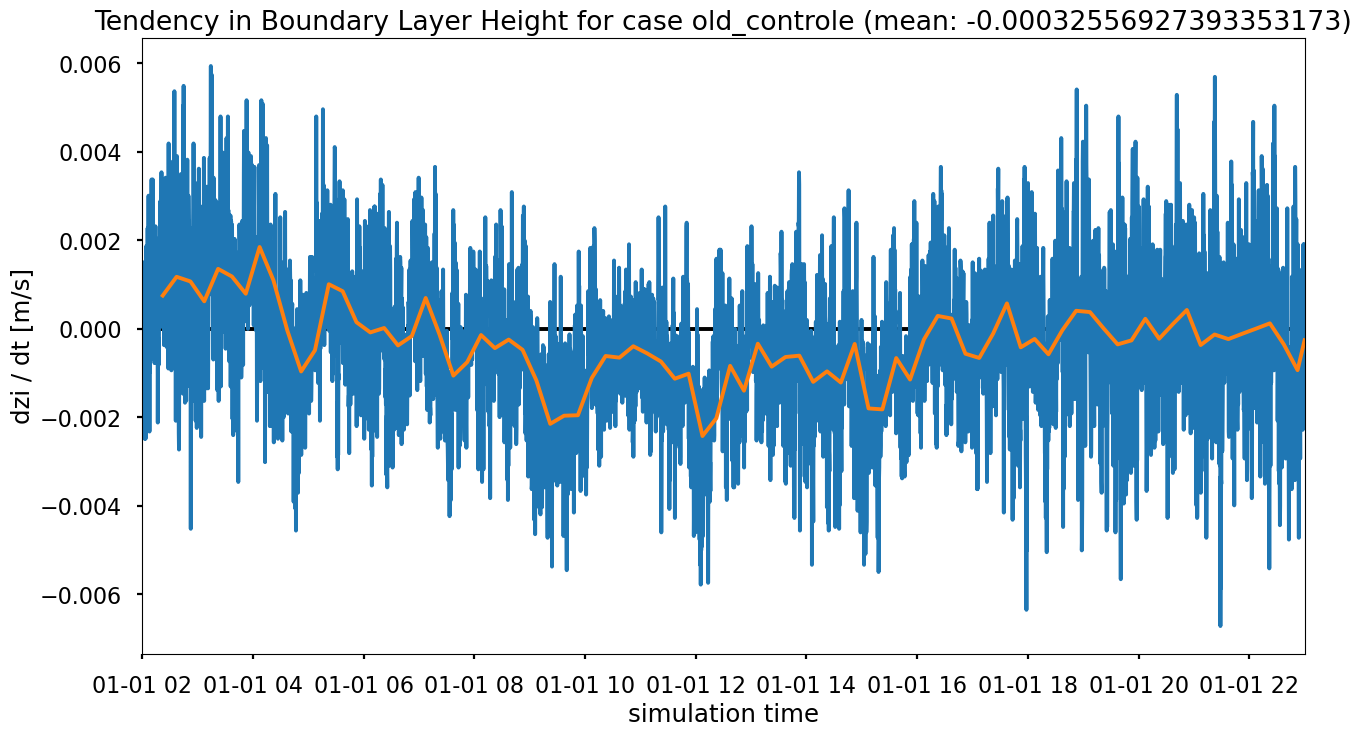

In [11]:
# Calculate Boundary layer tendency:

def calculate_dts(t_arraz):
    dts = np.zeros([len(t_arraz)-1])
    for i, timestep in enumerate(t_arraz):
        if i==len(t_arraz)-1:
            break
        timedelta = t_arraz[i+1]-timestep
        seconds = int(timedelta / np.timedelta64(1, 's'))
        dts[i] = seconds
    return dts

###############################

dzdt = np.diff(ts_ds["zi1_bar"].sel(time=slice("2000-01-01T02:00:00", "2000-01-01T23:00:00")).values)/\
    calculate_dts(ts_ds["time"].sel(time=slice("2000-01-01T02:00:00", "2000-01-01T23:00:00")).values)

dzdt15 = np.diff(ts_ds["zi1_bar"].sel(time=slice("2000-01-01T02:00:00", "2000-01-01T23:00:00"))\
                 .resample(time="15min").mean("time").values)/\
    calculate_dts(ts_ds["time"].sel(time=slice("2000-01-01T02:00:00", "2000-01-01T23:00:00"))\
                  .resample(time="15min").mean("time").values)

plt.figure(figsize=(15,8))
plt.title("Tendency in Boundary Layer Height for case "+name+" (mean: "+str(np.nanmean(dzdt))+")")
plt.axhline(0, color="black")
plt.plot(ts_ds["time"].sel(time=slice("2000-01-01T02:00:00", "2000-01-01T23:00:00")).values[1:], dzdt)
plt.plot(ts_ds["time"].sel(time=slice("2000-01-01T02:00:00", "2000-01-01T23:00:00"))\
                  .resample(time="15min").mean("time").values[1:], dzdt15)
# Height of maximum theta gradient
# plt.ylim(-0.025, 0.025)
plt.xlim(np.datetime64("2000-01-01T02:00:00"), np.datetime64("2000-01-01T23:00:00"))
plt.ylabel("dzi / dt [m/s]")
plt.xlabel("simulation time")
plt.savefig(outputdir+name+"_pbl_height_diffs.png", facecolor="white")

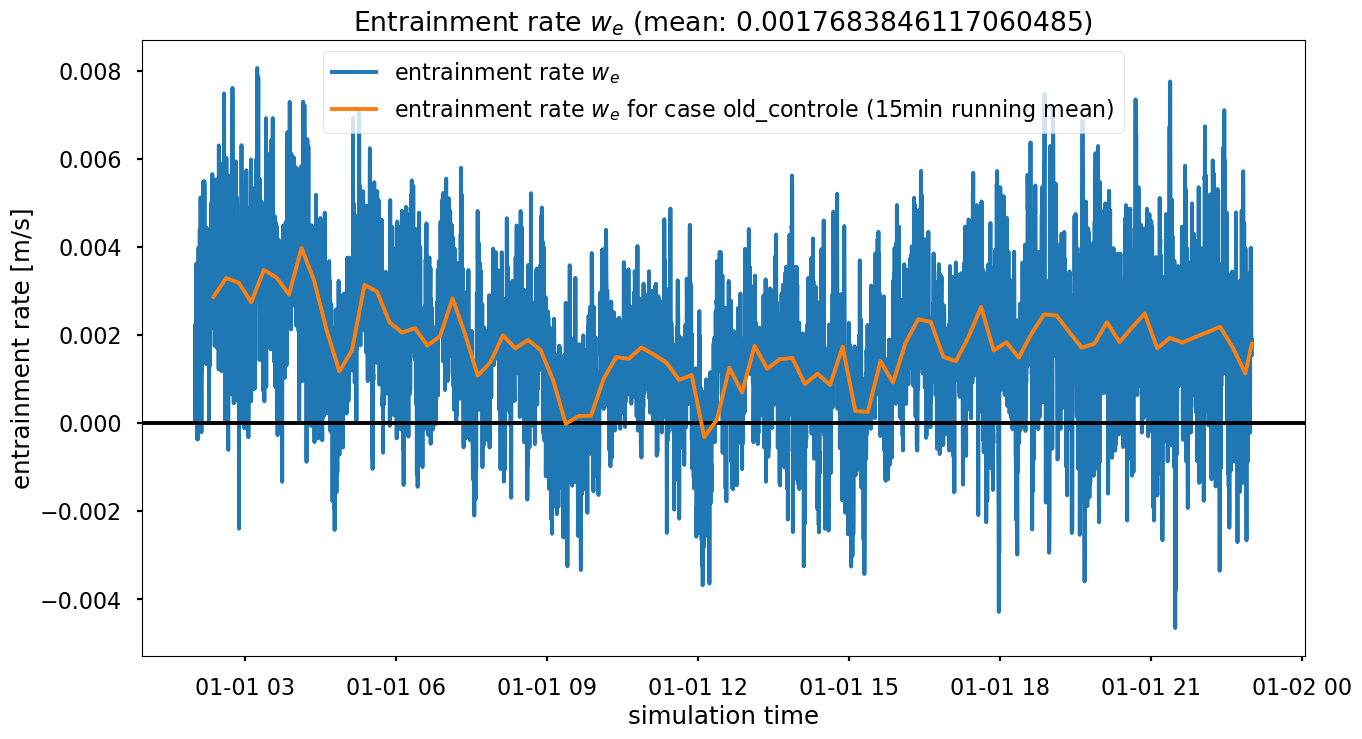

In [12]:
# If that worked calculate entrainment as well:

# Plot entrainment by time:
dzdt = dzdt
times = ts_ds["time"].sel(time=slice("2000-01-01T02:00:00", "2000-01-01T23:00:00")).values[1:]


dzdt15
zis = ts_ds["zi1_bar"].sel(time=slice("2000-01-01T02:00:00", "2000-01-01T23:00:00")).values
zi15 = ts_ds["zi1_bar"].sel(time=slice("2000-01-01T02:00:00", "2000-01-01T23:00:00"))\
    .resample(time="15min").mean("time").values

##############################3

def calculate_we_by_time(dzdt, zis, div=4e-6):
    we = np.zeros([len(dzdt)])
    for i,zi in enumerate(zis):
        if i==len(zis)-1:
            break
        we[i] = dzdt[i] + div*zi 
    return we

##############################
# Original:

we = calculate_we_by_time(dzdt, zis, div=divergence)
plt.figure(figsize=(15,8))
plt.title("Entrainment rate $w_e$ (mean: "+str(np.nanmean(we))+")")
plt.plot(times, we, label="entrainment rate $w_e$")
plt.xlabel("simulation time")
plt.ylabel("entrainment rate [m/s]")
    
##############################
# Resampled:

we15 = calculate_we_by_time(dzdt15, zi15, div=divergence)
plt.axhline(0, color="black")
plt.plot(ts_ds["time"].sel(time=slice("2000-01-01T02:00:00", "2000-01-01T23:00:00"))\
                  .resample(time="15min").mean("time").values[1:], we15,\
         label="entrainment rate $w_e$ for case "+name+" (15min running mean)")
plt.legend()
plt.savefig(outputdir+name+"_entrainment.png", facecolor="white")